# Vanishing and Exploding Gradients in Deep Learning

In [29]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [9]:
# Create a deep neural network with Sigmoid activation
model = Sequential([
    Dense(100, activation='sigmoid', input_shape=(100,)),
    *[Dense(100, activation='sigmoid') for _ in range(9)],  # Add 10 hidden layers
    Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

# Generate random data
x = np.random.rand(1000, 100).astype(np.float32)  # 1000 samples, 100 features
y = np.random.rand(1000, 1).astype(np.float32)    # 1000 samples, 1 target

# Train the model
model.fit(x, y, epochs=5, batch_size=32)

C:\Users\Nazm\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3535  
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0864
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0882
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0915
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0891


In [11]:
# Define a custom initializer with large weights
large_weights_initializer = tf.keras.initializers.RandomUniform(minval=0.9, maxval=1.1)

# Create a deep neural network with poor weight initialization
model = Sequential([
    Dense(100, kernel_initializer=large_weights_initializer, activation='relu', input_shape=(100,)),
    *[Dense(100, kernel_initializer=large_weights_initializer, activation='relu') for _ in range(9)],
    Dense(1)
])

# Compile and train (same as above)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
model.fit(x, y, epochs=5, batch_size=32)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan


In [13]:
# Replace Sigmoid activation with ReLU
model = Sequential([
    Dense(100, activation='relu', input_shape=(100,)),
    *[Dense(100, activation='relu') for _ in range(9)],
    Dense(1)
])

# Compile and train (same as above)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
model.fit(x, y, epochs=5, batch_size=32)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2288  
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0868
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0837
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0833
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0895


In [15]:
# Use Xavier Initialization (Glorot Uniform in TensorFlow)
model = Sequential([
    Dense(100, kernel_initializer='glorot_uniform', activation='relu', input_shape=(100,)),
    *[Dense(100, kernel_initializer='glorot_uniform', activation='relu') for _ in range(9)],
    Dense(1)
])

# Compile and train (same as above)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
model.fit(x, y, epochs=5, batch_size=32)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2393  
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0950
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0844
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0854
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832


In [17]:
# Add Batch Normalization to stabilize gradients
model = Sequential([
    Dense(100, activation='relu', input_shape=(100,)),
    BatchNormalization(),
    *[Sequential([Dense(100, activation='relu'), BatchNormalization()]) for _ in range(9)],
    Dense(1)
])

# Compile and train
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
model.fit(x, y, epochs=5, batch_size=32)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3772
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4683
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2541
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2226
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1819


In [19]:
# Use SGD with gradient clipping
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.0)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

# Train the model
model.fit(x, y, epochs=5, batch_size=32)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1488
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1306
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1198
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1090
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1140


In [21]:
# Generate random data
x = np.random.rand(1000, 100).astype(np.float32)
y = np.random.rand(1000, 1).astype(np.float32)

# Check for missing or invalid data
x = np.nan_to_num(x)
y = np.nan_to_num(y)

# Create a deep neural network
model = Sequential([
    Dense(100, activation='relu', input_shape=(100,)),
    *[Dense(100, activation='relu') for _ in range(9)],
    Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

# Train the model
model.fit(x, y, epochs=5, batch_size=32)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1902  
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0806
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0807
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0765
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0787


In [23]:
class GradientLogger(tf.keras.callbacks.Callback):
    def __init__(self, x_data, y_data):
        super().__init__()
        self.x_data = x_data
        self.y_data = y_data

    def on_train_batch_end(self, batch, logs=None):
        # Use GradientTape to compute gradients
        with tf.GradientTape() as tape:
            predictions = self.model(self.x_data, training=True)
            loss = self.model.compiled_loss(self.y_data, predictions)

        # Compute gradients
        gradients = tape.gradient(loss, self.model.trainable_weights)
        
        # Log gradient norms
        gradient_norms = [tf.norm(g).numpy() for g in gradients if g is not None]
        print(f"Batch {batch + 1}, Gradient Norms: {gradient_norms}")

In [25]:
# Generate synthetic data
x = np.random.rand(1000, 100).astype(np.float32)
y = np.random.rand(1000, 1).astype(np.float32)

# Define the deep neural network
model = Sequential([
    Dense(100, activation='relu', input_shape=(100,)),
    *[Dense(100, activation='relu') for _ in range(9)],
    Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

# Initialize the GradientLogger with the data
gradient_logger = GradientLogger(x, y)

# Train the model
model.fit(x, y, epochs=1, batch_size=32, callbacks=[gradient_logger])

Batch 1, Gradient Norms: [0.047103215, 0.0093542915, 0.069715105, 0.019688725, 0.09451063, 0.03446611, 0.107869186, 0.056574743, 0.115154035, 0.0894648, 0.10504029, 0.14160638, 0.09447721, 0.20570806, 0.13077965, 0.33136943, 0.15247189, 0.52818507, 0.18230234, 0.8637111, 0.12196019, 0.96604615]
 1/32 ━━━━━━━━━━━━━━━━━━━━ 21s 691ms/step - loss: 0.3486Batch 2, Gradient Norms: [0.046901777, 0.009319054, 0.06934904, 0.019580167, 0.092391565, 0.03367134, 0.10615823, 0.055664107, 0.11422431, 0.08874974, 0.10286663, 0.1383263, 0.09023723, 0.19584756, 0.1198422, 0.30257463, 0.14238971, 0.49155626, 0.17214249, 0.80760974, 0.11909158, 0.9211229]
 2/32 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.3269  Batch 3, Gradient Norms: [0.04574229, 0.009083722, 0.06771098, 0.0191128, 0.08920476, 0.032499313, 0.104056485, 0.054533325, 0.114040285, 0.08854817, 0.10049369, 0.13471006, 0.08691463, 0.18771416, 0.111925595, 0.28100997, 0.1348105, 0.46235326, 0.1639867, 0.7586493, 0.11813552, 0.88080406]
 3/32 ━━

C:\Users\Nazm\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:664: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(


Batch 4, Gradient Norms: [0.046156216, 0.009169538, 0.0670509, 0.018928315, 0.08724715, 0.03176359, 0.101702005, 0.053343486, 0.11349364, 0.08828586, 0.09816488, 0.13154086, 0.08412038, 0.18111712, 0.105752684, 0.2640815, 0.12780964, 0.43450078, 0.15624909, 0.71015793, 0.11808753, 0.84125435]
 4/32 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.3071Batch 5, Gradient Norms: [0.04682733, 0.009313563, 0.0665175, 0.018806089, 0.08464438, 0.030870795, 0.09960426, 0.052405532, 0.1127078, 0.08784697, 0.09446708, 0.12657191, 0.0801368, 0.17197484, 0.09696569, 0.24009463, 0.11708115, 0.39194018, 0.14615418, 0.6451067, 0.11917201, 0.7926223]
 5/32 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.3044Batch 6, Gradient Norms: [0.048874937, 0.009738891, 0.066031255, 0.018688485, 0.082840964, 0.030267365, 0.09919827, 0.05229637, 0.11263585, 0.08785116, 0.09249104, 0.12371989, 0.07822479, 0.16704352, 0.09043642, 0.22204226, 0.10906567, 0.35979903, 0.13875706, 0.5957383, 0.12064017, 0.7522944]
 6/32 ━━━━━━━━━

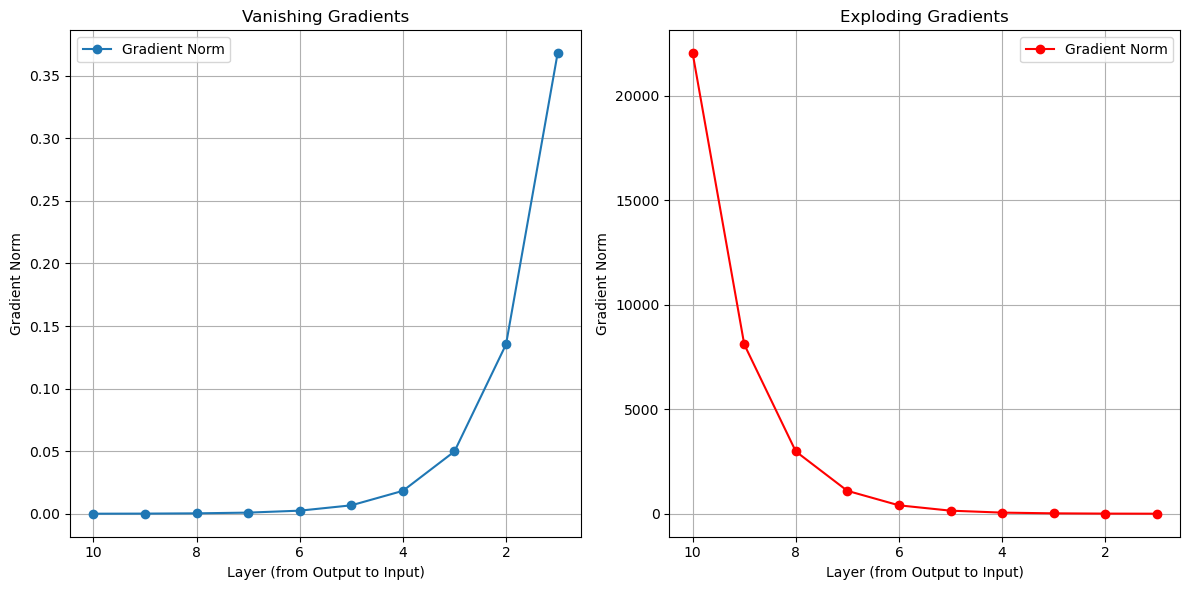

In [31]:
# Create a figure for the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Data for vanishing gradients
layers = np.arange(1, 11)  # Layers from 1 to 10
vanishing_gradients = np.exp(-layers)  # Exponentially decreasing gradients

# Data for exploding gradients
exploding_gradients = np.exp(layers)  # Exponentially increasing gradients

# Vanishing Gradients Plot
axes[0].plot(layers, vanishing_gradients, marker='o', label='Gradient Norm')
axes[0].set_title("Vanishing Gradients")
axes[0].set_xlabel("Layer (from Output to Input)")
axes[0].set_ylabel("Gradient Norm")
axes[0].invert_xaxis()  # Simulate backward propagation (last layer to first)
axes[0].grid(True)
axes[0].legend()

# Exploding Gradients Plot
axes[1].plot(layers, exploding_gradients, marker='o', color='r', label='Gradient Norm')
axes[1].set_title("Exploding Gradients")
axes[1].set_xlabel("Layer (from Output to Input)")
axes[1].set_ylabel("Gradient Norm")
axes[1].invert_xaxis()  # Simulate backward propagation (last layer to first)
axes[1].grid(True)
axes[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()